Python, pandas and wine bars 
----------------------------

Often business owners, start-ups or marketers need to categorize customers or products into homogenous groups in order to achieve effective sales campaign or personalisation. 

Say your partner Sam Greenbucks travels the world sipping wine in search of incredible wine deals that he buys in bulks. Based in London, you work with Sam with the remit to sell this stuff on to quality retail stores at a profit.

You reach out to customers via Facebook, Twitter even through occasional direct mailing. However the e-mail newsletter drums up the most business. So far you've been doing well but Sam thinks you could do better. Easier said than done ... you soon come to realise. Sure, you can look at a particular purchase such as how 15 more customers bought Cabernet Sauvignon in May at a 40 percent discount, however you can't tell whether this was due to the minimum purchase requirement of just a three-bottle bundle or the nice price discount. 

For the 18 months, you've sent one newsletter per month. Usually there are two or three wine deals in each e-mail, perhaps one would be on Champagne, another on Pinot Noir or Proseco. Fantastic deals are on offer sometimes up to 60 percent or more off of retail. It'd be nice if you could understand the customers a little more and perhaps segment the list into groups based on interest. Then, you could customize your monthly newsletter to each segment and maybe drum up some more business. Whichever deal you thought matched up better with the segment could go in the subject line and would come first in the newsletter. 



<div class="alert alert-block alert-info">By the way, this is a challenge that each and every other industry is now facing. Take the case of a property developer looking to make a decision on the type and number of flats they should build on a piece of land they have been holding for the last three years. They want to group their catchment area into groups with similar demographic attributes such as median age, median income level and so on. Failure to do would amount to many years of unsold units.<br>


<br> Similarly, pharmaceutical companies might want to cluster doctors based on the number of prescriptions for each drug they write annually. The company can then organise its sales force around groups of physcians: a GP cluster, a lifestyle health cluster, etc. 

That type of targeting can result in a bump in sales. The question is how do you segment the list? Where do you start? This is an opportunity to let the computer segment the list for you. 

Clustering groups data categories into subsets in such a manner that those that are similar are grouped together while making sure that categories with different attributes are kept apart. 

<img src=http://wineglassmarketing.com/wp-content/uploads/2015/02/DatabasePeopleSorted.png "Customer clusters"/>

In the context of customer segmentation, clustering can be achieved through various algorithms that differ significantly in their notion of what constitutes a cluster and how to efficiently find them. Popular notions of clusters include groups with small distances among the cluster members, dense areas of the data space or intervals between data points.

The appropriate clustering algorithm and parameter settings (including values such as the distance function to use, a density threshold or the number of expected clusters) depend on the individual data set and intended use of the results.


<div class="alert alert-block alert-info"> A common cluster analysis method is a mathematical algorithm known as **k-means cluster analysis**. The clusters that result assist in better customer modeling and predictive analytics, and are also are used to target customers with offers and incentives personalized to their wants, needs and preferences.

The process is not based on any predetermined thresholds or rules. Rather, the data itself reveals the customer attributes that inherently exist within the population of customers.

While Excel Solver can provide a way to perform cluster analysis, Python's pandas module does it very quickly, can do it at scale and provides a variety of data cleaning and visualisation possibililities.

Here we start by importing the required python modules: pandas for the analysis and ggplot for visualisation

In [37]:
import pandas as pd
from ggplot import*

Before diving into the analysis, we need to apply some styling to our tables.

We then need to load the data and tell python read it and display the first five rows to get a sense of our dataset. In this case we open our dataset of wine. The data we're using comes from **John Foreman**'s book **Data Smart**. The dataset contains information on marketing newsletters/e-mail campaigns and transaction data from customers (which offer customers responded to and what they bought).

In [61]:
from IPython.core.display import HTML

css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division

In [62]:
df_offers = pd.read_excel("WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


As per the table above, the metadata on each offer is saved in a spreadsheet, including varietal, minimum bottle quantity for purchase, discount off retail, whether the wine is past its peak, and country or state of origin. You also know which customers bought which offers, so you can dump that information out of MailChimp and into the spreadsheet with the offer metadata in a tab called Transactions. This transactional data is simply represented as the customer who made the purchase and which offer they purchased.

So here's a conundrum. You know there were 32 deals offered in the last year, and you have a list in the Transactions tab below broken out by customer. But in order to measure the distance between each customer and a cluster center, you need to position them in this 32-deal space. In other words, you need to understand the deals they did not take, and create a matrix of deals-by-customers, where each customer gets their own 32-deal column full of 1s for the deals they took and 0s for the ones they didn't.


<img src="http://core0.staticworld.net/images/article/2016/03/kuvee5-100652684-orig.jpg"  title="" />

We also need to open and read the first five rows of our transaction data

In [44]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


**K-means works by grouping the points together in such a way that the distance between all the points and the midpoint of the cluster they belong to is minimized.**


Customer clustering in practice
-------------------------------
Here we're attempting to group together similar minded customers so that we can find patterns and trends that can help us formulate future wine offers.

To do this, we're going to create a matrix that contains each customer and some sort of indicator (Yes=1 or No=0) for whether or not they responded to a given offer. 

Python's pandas module provides a simple way of doing just that: 

In [45]:
# we start by joining the offers and transactions table 
# Here we can see the benefits of using Python, a high-level programming language using "humans-like" syntax to run this command

df=pd.merge(df_offers, df_transactions)

# We then create a pivot table which will give us the number of times each customer responded to a given offer

matrix=df.pivot_table(index=['customer_name'], columns=['offer_id'], values="n")

# Pandas offer a simple way of cleaning up data which in many other applications can take a significant amount of analysts' time . 
# Here we simply tell pandas to replace NA values with 0 and make the index into a columntrix=matrix.fillna(0).reset_index()

matrix = matrix.fillna(0).reset_index()

# save a list of the 0/1 columns that we will use later

x_cols = matrix.columns[1:]


Below, we will create the clusters that we will use for our KMeans functionality.

Determining the number of clusters in a data set, a quantity often labelled k as in the k-means algorithm, is a frequent problem in data clustering. The correct choice of k can seem arbitrary, with interpretations depending on the shape and scale of the distribution of points in a data set and the desired clustering resolution of the user.
One has to bear in mind that there is a trade-off between the optimal choice of k that will strike a balance between maximum compression of the data using a single cluster, and maximum accuracy that would assign each data point to its own cluster.

A general rule of thumb is to have at least 7x as many records as I do clusters, hence our choice of five clusters.

In [49]:
from sklearn.cluster import KMeans

In [50]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=5)
# slice matrix so we only include the 0/1 indicator columns in the clustering
matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[2:]])
matrix.cluster.value_counts()

3    26
0    22
1    19
4    17
2    16
Name: cluster, dtype: int64

In [51]:
from sklearn.decomposition import PCA

**Principal component analysis (PCA)** is a technique used to bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize.

When dealing with a dataset with a large number of variables, the dispersion matrix can be too large to study and interpret properly. There would be too many pairwise correlations between the variables to consider. Graphical display of data may also not be of particular help incase the data set is very large. With 12 variables, for example, there will be more than 200 three-dimensional scatterplots to be studied!

To interpret the data in a more meaningful form, it is therefore necessary to reduce the number of variables to a few, interpretable linear combinations of the data

In our case we'are going to attempt to transform our multi-demensional dataset into a 2 dimensional dataset that can be easily visualised a scatterplot. 

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
matrix['x'] = pca.fit_transform(matrix[x_cols])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_cols])[:,1]
matrix = matrix.reset_index()

customer_clusters = matrix[['customer_name', 'cluster', 'x', 'y']]
customer_clusters.head()

offer_id,customer_name,cluster,x,y
0,Adams,4,1.007580,0.108215
1,Allen,3,-0.287539,0.044715
2,Anderson,2,-0.392032,1.038391
3,Bailey,4,0.699477,-0.022542
4,Baker,1,0.088183,-0.471695


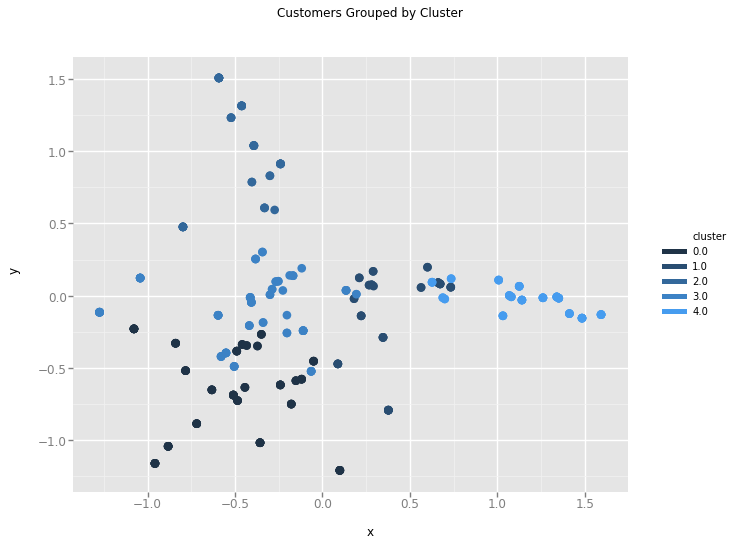

<ggplot: (-9223371879863894342)>

In [57]:
df = pd.merge(df_transactions, customer_clusters)
df = pd.merge(df_offers, df)

from ggplot import *

ggplot(df, aes(x='x', y='y', color='cluster')) + \
    geom_point(size=75) + \
    ggtitle("Customers Grouped by Cluster")

Is there anything that can be of practical use for our marketing effort ? Take cluster 3 for example. If we break out cluster 3 and compare it to the remaining customers, we can start to look for interesting facets that we might be able to exploit.

Let's take a look at take up by cluster 3 versus everyone else. It turns out that almost all of the Proseco that were on offer were purchased by its members. Members of Cluster 3 were also not very keen on Pinot Noir offers which were snatched at a rate of 44 by members of the other clusters. 

In [58]:
df['is_3'] = df.cluster==3
df.groupby("is_3").varietal.value_counts()

is_3   varietal          
False  Champagne             56
       Pinot Noir            40
       Espumante             38
       Prosecco              38
       Malbec                26
       Pinot Grigio          16
       Cabernet Sauvignon    12
       Merlot                11
       Chardonnay             5
True   Champagne             25
       Cabernet Sauvignon    20
       Chardonnay            10
       Merlot                 9
       Malbec                 6
       Prosecco               5
       Pinot Noir             4
       Espumante              2
       Pinot Grigio           1
Name: varietal, dtype: int64

You can also segment out numerical features. For instance, look at how the mean of the min_qty field breaks out between 3 vs. non-3. It seems like members of cluster 3 don't hold back when they see a good deal. 

In [59]:
df.groupby("is_3")[['min_qty', 'discount']].mean()

,min_qty,discount
is_3,,
False,49.636364,57.586777
True,84.292683,65.073171


You now have enough material and pointers to draft your next personalised e-mail and ready to go! 